In [1]:
%load_ext autoreload
%autoreload 2  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import seaborn as sns
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
folder1 = Path('F:\\Studium\\MS\\thesis\\master_thesis\\processed_crossdock_noH_ca_only_temp\\reconstruction\\predictions_r1_t500')
folder2 = Path('F:\\Studium\\MS\\thesis\\master_thesis\\processed_crossdock_noH_ca_only_temp\\reconstruction\\predictions_r10_t50')
folders = [folder1, folder2]
names = ['R1_T500', 'R10_T50']
mols = [utils.read_molecules(folder) for folder in folders]

In [3]:
dfs = [utils.read_metrics(folder) for folder in folders]

In [4]:
dfs[0].head(105)

,ligand,QED,SA,Lipinski,Vina,indices
0,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.278021,0.36,5,7.5,0
1,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.519747,0.58,5,7.5,1
2,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.544563,0.74,5,4.5,2
3,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.778423,0.54,5,6.3,3
4,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.495852,0.58,5,6.7,4
...,...,...,...,...,...,...
100,1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1...,0.250996,0.58,5,8.5,0
101,1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1...,0.873386,0.63,5,7.0,1
102,1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1...,0.562036,0.6,5,8.0,2
103,1umd-B-rec-1umb-tdp-lig-tt-docked-1-pocket10_1...,0.07823,0.49,1,6.9,3


R1_T500
QED mean: 0.47, QED std: 0.19, QED max: 0.94, QED min: 0.02
SA mean: 0.62, SA std: 0.12, SA max: 0.99, SA min: 0.23
Lipinski mean: 4.70, Lipinski std: 0.69, Lipinski max: 5.00, Lipinski min: 0.00
Vina mean: 6.24, Vina std: 1.89, Vina max: 13.80, Vina min: 0.00
R10_T50
QED mean: 0.53, QED std: 0.19, QED max: 0.95, QED min: 0.02
SA mean: 0.68, SA std: 0.12, SA max: 0.99, SA min: 0.24
Lipinski mean: 4.76, Lipinski std: 0.63, Lipinski max: 5.00, Lipinski min: 0.00
Vina mean: 6.52, Vina std: 2.06, Vina max: 14.50, Vina min: 0.10


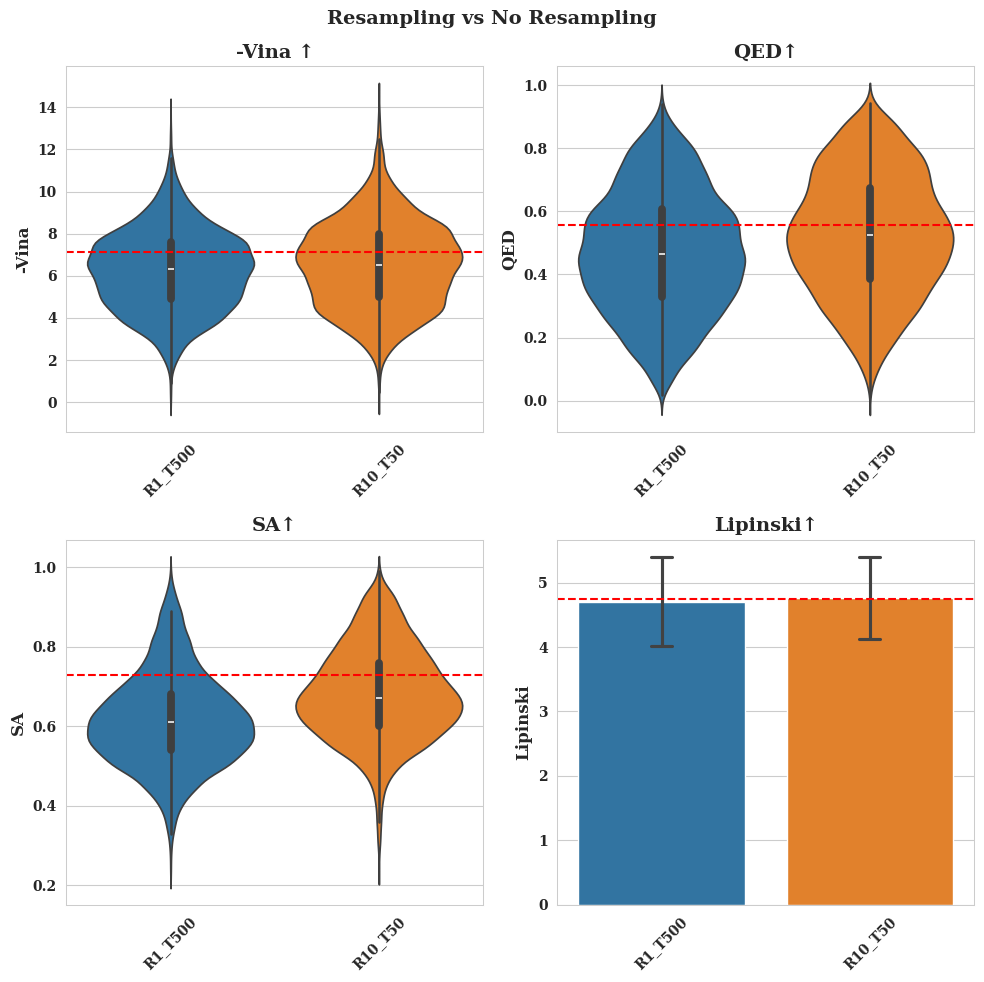

In [14]:
utils.plot_metrics(dfs, names, (2,2), (10, 10), suptitle="Resampling vs No Resampling", save="resampling_vs_no_resampling.pdf", include_paper_results=True)

In [6]:
N = 5
random_pockets = [18, 48]
random_pocket_names = [df["ligand"].unique()[lig_id] for df, lig_id in zip(dfs, random_pockets)]
print(random_pocket_names)
dfs_topN = [
    utils.find_top_N(df.copy(), N, random_pocket) 
    for df, random_pocket in zip(dfs, random_pockets)
    ]
names_topN = [name + f'_top{N}' for name in names]

['2cy0-A-rec-2d5c-skm-lig-tt-min-0-pocket10_2cy0-A-rec-2d5c-skm-lig-tt-min-0_gen.sdf', '4tos-A-rec-4tos-355-lig-tt-min-0-pocket10_4tos-A-rec-4tos-355-lig-tt-min-0_gen.sdf']
Random pocket id: 18, name: 2cy0-A-rec-2d5c-skm-lig-tt-min-0-pocket10_2cy0-A-rec-2d5c-skm-lig-tt-min-0_gen.sdf
Random pocket id: 48, name: 4tos-A-rec-4tos-355-lig-tt-min-0-pocket10_4tos-A-rec-4tos-355-lig-tt-min-0_gen.sdf


In [7]:
# df_topN_ours = utils.find_top_N(dfs[1].copy(), N=5, weights=[1, 1, 2])
# df_topN_paper = utils.find_top_N(dfs[1].copy(), N=5, weights=[0, 0, 1])
# df_topN_ours['type'] = 'Ours'
# df_topN_paper['type'] = 'Paper'
# df_topN = pd.concat([df_topN_ours, df_topN_paper])
# sns.kdeplot(data=df_topN, x='QED', y='SA', fill=True, hue='type', alpha=0.7)

In [8]:
# sns.kdeplot(data=df_topN, x='QED', y='Vina', fill=True, hue='type', alpha=0.7, hue_order=['Paper', 'Ours'])

R1_T500_top5
QED mean: 0.74, QED std: 0.12, QED max: 0.94, QED min: 0.22
SA mean: 0.70, SA std: 0.10, SA max: 0.95, SA min: 0.39
Lipinski mean: 4.99, Lipinski std: 0.15, Lipinski max: 5.00, Lipinski min: 2.00
Vina mean: 7.93, Vina std: 1.66, Vina max: 13.80, Vina min: 3.80
R10_T50_top5
QED mean: 0.75, QED std: 0.13, QED max: 0.94, QED min: 0.27
SA mean: 0.76, SA std: 0.10, SA max: 0.96, SA min: 0.48
Lipinski mean: 4.99, Lipinski std: 0.12, Lipinski max: 5.00, Lipinski min: 4.00
Vina mean: 8.28, Vina std: 1.79, Vina max: 13.90, Vina min: 4.20


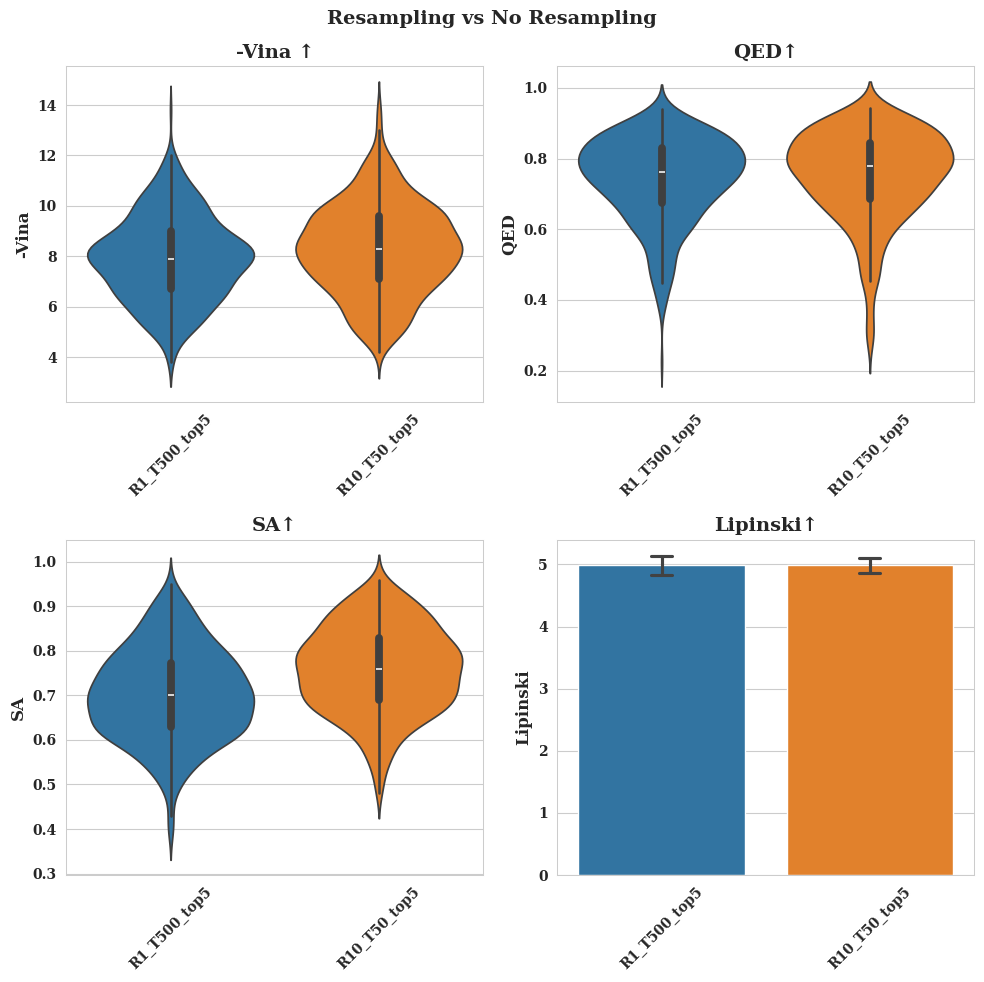

In [13]:
utils.plot_metrics(dfs_topN, names_topN, (2,2), (10, 10), suptitle="Resampling vs No Resampling", save="resampling_vs_no_resampling.pdf")

R1_T500
QED mean: 0.47, QED std: 0.19, QED max: 0.94, QED min: 0.02
SA mean: 0.62, SA std: 0.12, SA max: 0.99, SA min: 0.23
Lipinski mean: 4.70, Lipinski std: 0.69, Lipinski max: 5.00, Lipinski min: 0.00
Vina mean: 6.24, Vina std: 1.89, Vina max: 13.80, Vina min: 0.00
R10_T50
QED mean: 0.53, QED std: 0.19, QED max: 0.95, QED min: 0.02
SA mean: 0.68, SA std: 0.12, SA max: 0.99, SA min: 0.24
Lipinski mean: 4.76, Lipinski std: 0.63, Lipinski max: 5.00, Lipinski min: 0.00
Vina mean: 6.52, Vina std: 2.06, Vina max: 14.50, Vina min: 0.10
R1_T500_top5
QED mean: 0.74, QED std: 0.12, QED max: 0.94, QED min: 0.22
SA mean: 0.70, SA std: 0.10, SA max: 0.95, SA min: 0.39
Lipinski mean: 4.99, Lipinski std: 0.15, Lipinski max: 5.00, Lipinski min: 2.00
Vina mean: 7.93, Vina std: 1.66, Vina max: 13.80, Vina min: 3.80
R10_T50_top5
QED mean: 0.75, QED std: 0.13, QED max: 0.94, QED min: 0.27
SA mean: 0.76, SA std: 0.10, SA max: 0.96, SA min: 0.48
Lipinski mean: 4.99, Lipinski std: 0.12, Lipinski max: 5.00

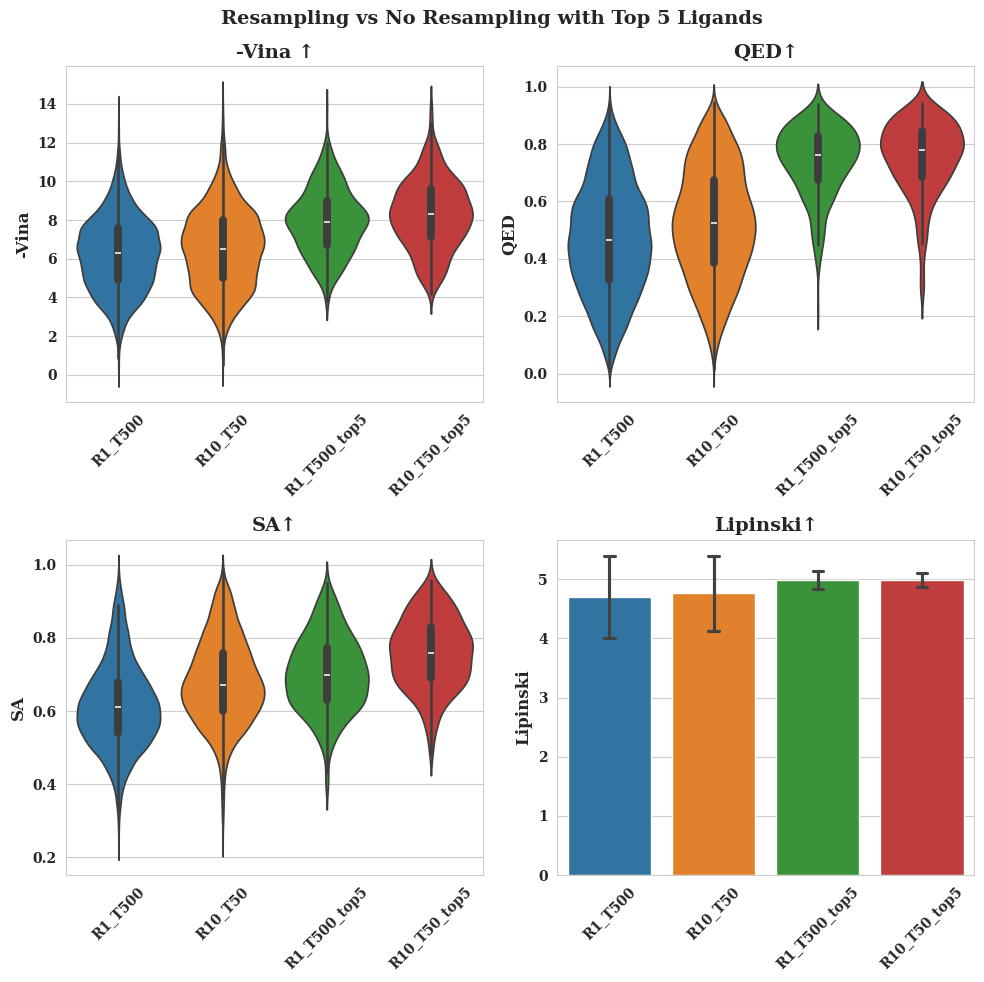

In [10]:
utils.plot_metrics(dfs + dfs_topN, names + names_topN, (2,2), (10, 10), suptitle="Resampling vs No Resampling with Top 5 Ligands", save="resampling_vs_no_res_top5.pdf")

In [11]:
v = utils.plot_mols(mols, dfs_topN, names_topN, )
v

File: 1ai4-A-rec-1ai5-mnp-lig-tt-docked-0-pocket10_1ai4-A-rec-1ai5-mnp-lig-tt-docked-0_gen.sdf
row 0: R1_T500_top5
row 1: R10_T50_top5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
v.apng(2)